In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson, expon, erlang, norm
import math

# Binomial distribution

## Definitions
- Binomial distribution: the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability 1 - p). 
- Bernoulli trial: A single success/failure experiment. Example: flipping a coins (heads = success, tails = failure)
- Bernoulli process: a sequence of outcomes. Example: flipping a coin n times.
- Bernoulli distribution: Binomial distribution when n = 1.
- pmf = Probability mass function. It gives the probability that a discrete random variable is exactly equal to some value.

## Use case
There are three coins. p will be the probability to get heads
- A fair coin: the probability to get heads is p = 0.5.
- A biased coin with p = 0.6.
- A biased coin with p = 0.4.


You flip each of those coins 100 times.

What is the probability to get x times heads with each coin? Compute pmf = P(X=x) for x = 0, 1.. to 99, 100

What is the probability to obtain heads a number of times between 50 and 60? P(50<=X<=60) = P(X=50) + P(X=51) + ... + P(X=60) = pmf(50) + pmf(51) + .. +pmf(60)

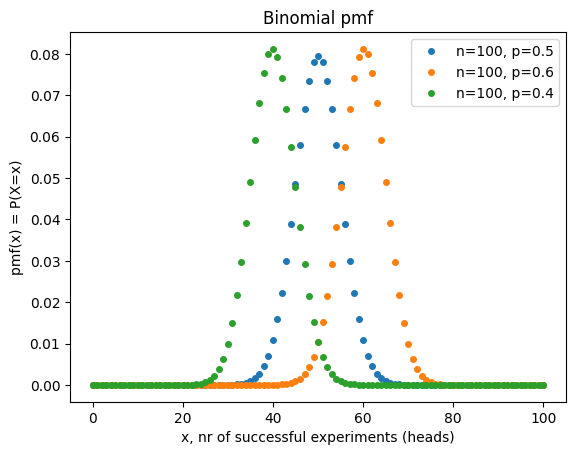

In [2]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

fig, ax = plt.subplots(1, 1)

n, pa, pb, pc = 100, 0.5, 0.6, 0.4
labela, labelb, labelc = 'n=100, p=0.5','n=100, p=0.6','n=100, p=0.4'

x = np.arange(0, n+1)
ax.plot(x, binom.pmf(x, n, pa), 'o', ms=4, label=labela)
ax.plot(x, binom.pmf(x, n, pb), 'o', ms=4, label=labelb)
ax.plot(x, binom.pmf(x, n, pc), 'o', ms=4, label=labelc)
ax.set_xlabel("x, nr of successful experiments (heads)")
ax.set_ylabel("pmf(x) = P(X=x)")
ax.set_title("Binomial pmf")
ax.legend()


In [3]:
for p in [0.4, 0.5, 0.6]:
    probability = binom.pmf(np.arange(50,61,1),n, p).sum()
    print("The probability of obtaining between 50 and 60 times heads with a coin with p={} is {}".format(p, probability))

The probability of obtaining between 50 and 60 times heads with a coin with p=0.4 is 0.02708115629457838
The probability of obtaining between 50 and 60 times heads with a coin with p=0.5 is 0.5221945185847366
The probability of obtaining between 50 and 60 times heads with a coin with p=0.6 is 0.5211629726108757


## More definitions
- cdf = Cumulative distribution function. cdf(x) = P(X<=x)
- ppf = Quantile function / Percentile function / Percent-point function (Inverse function). ppf(prob)= x where x is the value with cdf(x) = P(X<=x) = prob

## More questions
- What is the probability to obtain a number of successful experiments which is less than or equal to x? Compute P(X<=x) for x = 0, 1 ... 99, 100
- (Inverse question) What is the x value with cdf(x)=P(X<=x) = perc? Compute x for perc = 0, 0.01, 0.02, 0.03, 0.04, ... 0.99, 1
- If we want to compute the probability to obtain between 50 and 60 successful trials for each coin, we can use cdf. Compute P(50<=X<=60)=cdf(60)-cdf(49)

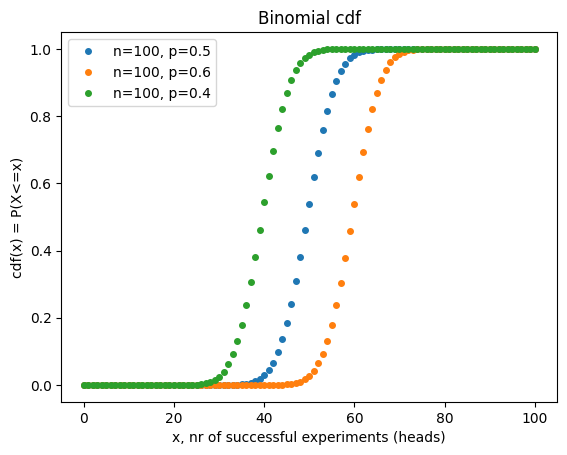

In [4]:
fig, ax = plt.subplots(1, 1)
n, p = 100, 0.5
x = np.arange(0, 101)
ax.plot(x, binom.cdf(x, n, p), 'o', ms=4, label='n=100, p=0.5')
n, p = 100, 0.6
x = np.arange(0, 101)
ax.plot(x, binom.cdf(x, n, p), 'o', ms=4, label='n=100, p=0.6')
n, p = 100, 0.4
x = np.arange(0, 101)
ax.plot(x, binom.cdf(x, n, p), 'o', ms=4, label='n=100, p=0.4')
ax.set_xlabel("x, nr of successful experiments (heads)")
ax.set_ylabel("cdf(x) = P(X<=x)")
ax.set_title("Binomial cdf")
ax.legend()

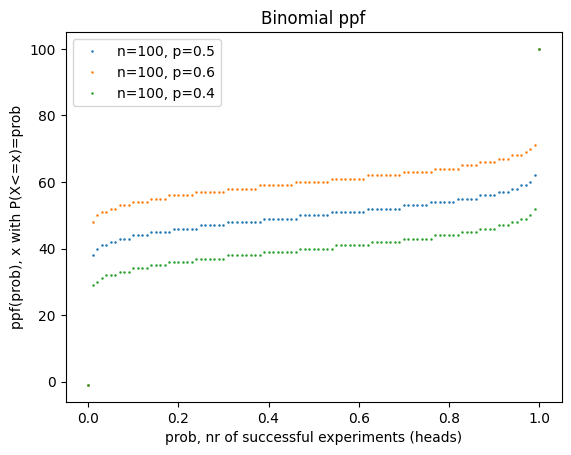

In [5]:
fig, ax = plt.subplots(1, 1)


x = np.arange(0,1.001,0.01)
n, p = 100, 0.5

ax.plot(x, binom.ppf(x,n,p), 'o', ms=0.8, label='n=100, p=0.5')
n, p = 100, 0.6
ax.plot(x, binom.ppf(x,n,p), 'o', ms=0.8, label='n=100, p=0.6')
n, p = 100, 0.4
ax.plot(x, binom.ppf(x,n,p), 'o', ms=0.8, label='n=100, p=0.4')

ax.set_xlabel("prob, nr of successful experiments (heads)")
ax.set_ylabel("ppf(prob), x with P(X<=x)=prob")
ax.set_title("Binomial ppf")
ax.legend()

In [6]:
for p in [0.4, 0.5, 0.6]:
    probability = binom.cdf(60,n, p)-binom.cdf(49,n, p)
    print("The probability of obtaining between 50 and 60 times heads with a coin with p={} is {}".format(p, probability))

The probability of obtaining between 50 and 60 times heads with a coin with p=0.4 is 0.02708115629457819
The probability of obtaining between 50 and 60 times heads with a coin with p=0.5 is 0.5221945185847371
The probability of obtaining between 50 and 60 times heads with a coin with p=0.6 is 0.5211629726108737


## Some summarizing values
- Mean = n*p
- Median = cdf(0.5)
- Variance
- Standard deviation
- 'c%' confidence interval. (x1, x2) for which P(X > x1 and X < x2) = c%. cdf(x1) = (1-'c%')/2 , cdf(x2) = 0.5 + 'c%'/2.

Let's compute the mean value, 95 % confidence interval (with cdf and with interval), and the median

In [7]:
for p in [pa, pb, pc]:
    print("""Binomial distribution, n=100, p={}: 
        - The expected value (mean) is {}
        - x1 with cdf(x1) = P(X<=x1) = 0.025. x1 = ppf(0.025) = {}
        - x2 with cdf(x2) = P(X<=x2) = 0.975. x2 = ppf(0.975) = {}
        - (x1, x2) for which P(x1<X<x2) = 0.95  OR  95% confidence interval ={}
        - The median is {}
    
    """.format(p,binom.mean(n,p), binom.ppf(0.025,n,p),binom.ppf(0.975,n,p), binom.interval(0.95,n, p),binom.median(n,p)))

Binomial distribution, n=100, p=0.5: 
        - The expected value (mean) is 50.0
        - x1 with cdf(x1) = P(X<=x1) = 0.025. x1 = ppf(0.025) = 40.0
        - x2 with cdf(x2) = P(X<=x2) = 0.975. x2 = ppf(0.975) = 60.0
        - (x1, x2) for which P(x1<X<x2) = 0.95  OR  95% confidence interval =(40.0, 60.0)
        - The median is 50.0
    
    
Binomial distribution, n=100, p=0.6: 
        - The expected value (mean) is 60.0
        - x1 with cdf(x1) = P(X<=x1) = 0.025. x1 = ppf(0.025) = 50.0
        - x2 with cdf(x2) = P(X<=x2) = 0.975. x2 = ppf(0.975) = 69.0
        - (x1, x2) for which P(x1<X<x2) = 0.95  OR  95% confidence interval =(50.0, 69.0)
        - The median is 60.0
    
    
Binomial distribution, n=100, p=0.4: 
        - The expected value (mean) is 40.0
        - x1 with cdf(x1) = P(X<=x1) = 0.025. x1 = ppf(0.025) = 31.0
        - x2 with cdf(x2) = P(X<=x2) = 0.975. x2 = ppf(0.975) = 50.0
        - (x1, x2) for which P(x1<X<x2) = 0.95  OR  95% confidence interval =(31.0

# Poisson distribution
## Definitions
- Poisson distribution: discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.
- Poisson point process: a process in which events occur continuously and independently at a constant average rate.
## Use case
There are three different help desks in the city hall:
- Help desk A assists 5 people per hour.
- Help desk B assists 10 people per hour.
- Help desk C assists 15 people per hour.

What are the probabilities for each help desk to receive X = 0, 1... 29, 30 on a day?

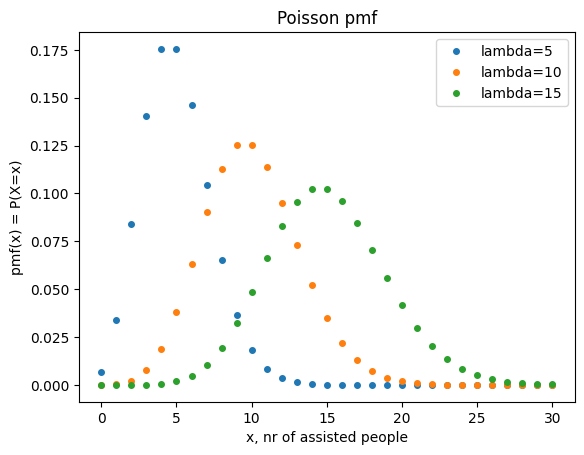

In [8]:
# Poisson distribution
fig, ax = plt.subplots(1, 1)

n, lamb_a, lamb_b, lamb_c = 30, 5, 10, 15
labela, labelb, labelc = 'lambda=5','lambda=10','lambda=15'

x = np.arange(0, n+1)
ax.plot(x, poisson.pmf(x, lamb_a), 'o', ms=4, label=labela)
ax.plot(x, poisson.pmf(x, lamb_b), 'o', ms=4, label=labelb)
ax.plot(x, poisson.pmf(x, lamb_c), 'o', ms=4, label=labelc)
ax.set_xlabel("x, nr of assisted people")
ax.set_ylabel("pmf(x) = P(X=x)")
ax.set_title("Poisson pmf")
ax.legend()

## Approximating the Poisson distribution with a binomial discribution

We could also have defined the following Bernoulli event:
- Success: Someone has come to the help desk at that minute
- Failure: No one has come to the help desk at that minute

n is the number of Bernoulli trials. n = 60 (60 minutes in one hour)

Here we have the probability that someone arrives at a certain minute for each help desk:
- Help desk A: p = lambda_a / n = 5/60
- Help desk B: p = lambda_b / n = 10/60
- Help desk C: p = lambda_c / n = 15/60

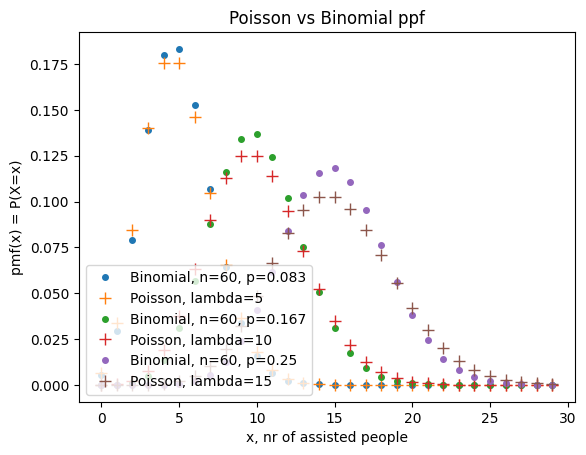

In [9]:
fig, ax = plt.subplots(1, 1)

instants = 60
x = np.arange(0,30)
n_poisson, pa, pb, pc = instants, lamb_a/instants,lamb_b/instants, lamb_c/instants

for i in range(3):
    p = [pa,pb,pc][i]
    lamb = [lamb_a,lamb_b, lamb_c][i]
    ax.plot(x, binom.pmf(x,n_poisson,p), 'o', ms=4, label='Binomial, n={}, p={}'.format(n_poisson,round(p,3)))
    ax.plot(x, poisson.pmf(x,lamb), '+', ms=8, label='Poisson, lambda={}'.format(lamb))



ax.set_xlabel("x, nr of assisted people")
ax.set_ylabel("pmf(x) = P(X=x)")
ax.set_title("Poisson vs Binomial ppf")
ax.legend(loc="lower left")

If we had defined 'finer' instants, we would have obtained a better approximation. The points of the pmf are practically the same for both families of distributions if we redefine our Bernoulli trials:
- Success: Someone has come to the help desk at that second
- Failure: No one has come to the help desk at that second

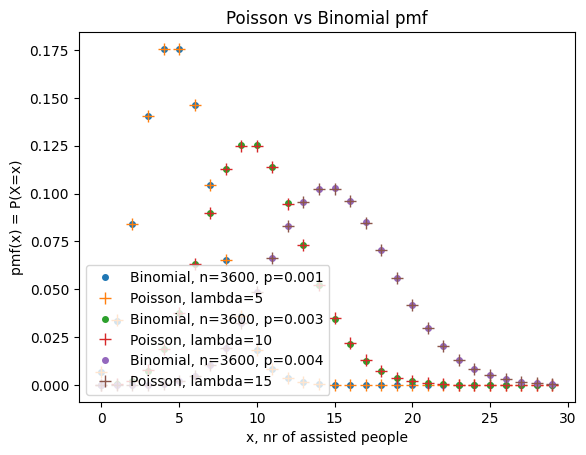

In [10]:
fig, ax = plt.subplots(1, 1)

instants = 60*60
x = np.arange(0,30)
n_poisson, pa, pb, pc = instants, lamb_a/instants,lamb_b/instants, lamb_c/instants

for i in range(3):
    p = [pa,pb,pc][i]
    lamb = [lamb_a,lamb_b, lamb_c][i]
    ax.plot(x, binom.pmf(x,n_poisson,p), 'o', ms=4, label='Binomial, n={}, p={}'.format(n_poisson,round(p,3)))
    ax.plot(x, poisson.pmf(x,lamb), '+', ms=8, label='Poisson, lambda={}'.format(lamb))



ax.set_xlabel("x, nr of assisted people")
ax.set_ylabel("pmf(x) = P(X=x)")
ax.set_title("Poisson vs Binomial pmf")
ax.legend(loc="lower left")

# Exponential distribution

## Definitions
- Exponential distribution: the exponential distribution or negative exponential distribution is the probability distribution of the time between events in a Poisson point process. It is memoryless. Since it is a continuous distribution, we don't have a pmf, but a probability density function (pdf).
- Memorylessness: is a property of certain probability distributions. It usually refers to the cases when the distribution of a "waiting time" until a certain event does not depend on how much time has elapsed already. To model memoryless situations accurately, we must constantly 'forget' which state the system is in: the probabilities would not be influenced by the history of the process.
- pdf = probability density function. Function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would be equal to that sample. Probability density is the probability per unit length, in other words, while the absolute likelihood for a continuous random variable to take on any particular value is 0 (since there is an infinite set of possible values to begin with).

## Use case
Let's compute the probability that a time between 10 and 20 minutes passes before a new citizen arrives to each help desk of our city hall. 


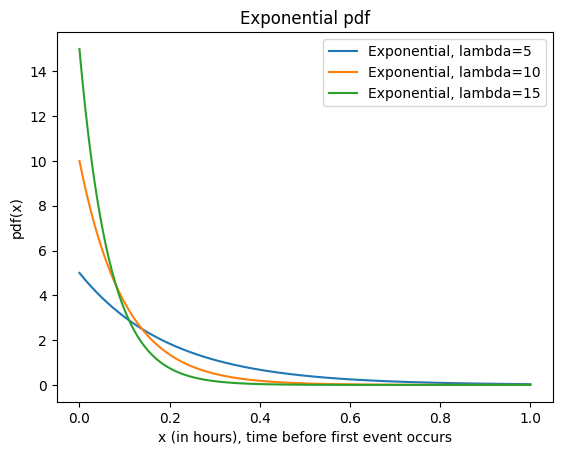

In [11]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0,1,240)

for i in range(3):
    lamb = [lamb_a,lamb_b, lamb_c][i]
    ax.plot(x, expon.pdf(x,scale=1/lamb), ms=2, label='Exponential, lambda={}'.format(lamb))

ax.set_xlabel("x (in hours), time before first event occurs")
ax.set_ylabel("pdf(x)")
ax.set_title("Exponential pdf")
ax.legend()

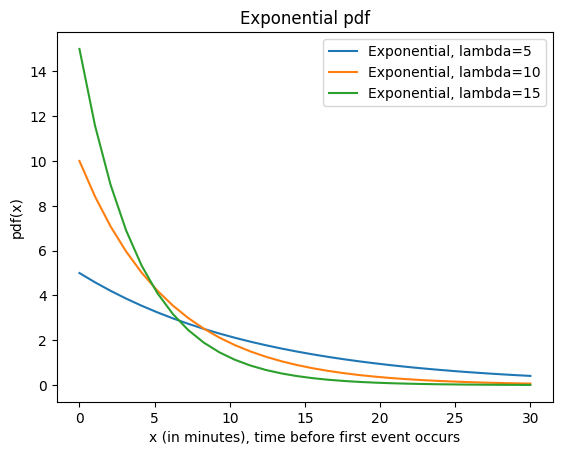

In [12]:
fig, ax = plt.subplots(1, 1)
minutes = 30
x = np.linspace(0,minutes/60,minutes)
x_min = np.linspace(0,minutes,minutes)
for i in range(3):
    lamb = [lamb_a,lamb_b, lamb_c][i]
    ax.plot(x_min, expon.pdf(x,scale=1/lamb), ms=2, label='Exponential, lambda={}'.format(lamb))

ax.set_xlabel("x (in minutes), time before first event occurs")
ax.set_ylabel("pdf(x)")
ax.set_title("Exponential pdf")
ax.legend()

In [13]:
lambdas = [lamb_a, lamb_b, lamb_c]
for i in range(3):
    lamb = lambdas[i]
    cdf1 = expon.cdf(10/60,scale = 1/lamb)
    cdf2 = expon.cdf(20/60,scale = 1/lamb)
    hd = ["A","B","C"][i]
    print("The probability that a time between 10 and 20 minutes passes before the first customer to arrive is {} for Help Desk {} (lambda = {})".format(cdf2-cdf1, hd, lamb))



The probability that a time between 10 and 20 minutes passes before the first customer to arrive is 0.24572260566951631 for Help Desk A (lambda = 5)
The probability that a time between 10 and 20 minutes passes before the first customer to arrive is 0.15320160949030948 for Help Desk B (lambda = 10)
The probability that a time between 10 and 20 minutes passes before the first customer to arrive is 0.07534705162481337 for Help Desk C (lambda = 15)


# Erlang distribution

## Definitions
- Exponential distribution: The Erlang distribution is the distribution of a sum of k independent exponential variables with mean 1/lambda each. Equivalently, it is the distribution of the time until the kth event of a Poisson process with a rate of lambda.


## Use case
Let's compute the probability that a time between 1 and 2 hours passes before the fifth citizen arrives to each help desk of our city hall.

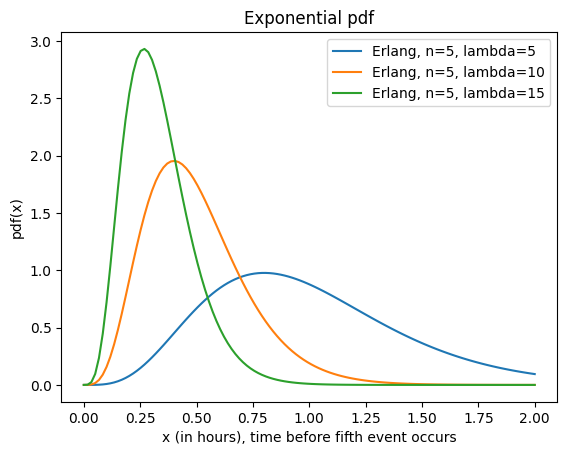

In [14]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0,2,120)
n=5

for i in range(3):
    lamb = [lamb_a,lamb_b, lamb_c][i]
    ax.plot(x, erlang.pdf(x,n,scale=1/lamb), ms=4, label='Erlang, n={}, lambda={}'.format(n, lamb))

ax.set_xlabel("x (in hours), time before fifth event occurs")
ax.set_ylabel("pdf(x)")
ax.set_title("Exponential pdf")
ax.legend()

In [15]:
lambdas = [lamb_a, lamb_b, lamb_c]
for i in range(3):
    lamb = lambdas[i]
    cdf1 = erlang.cdf(1,a=5,scale = 1/lamb)
    cdf2 = erlang.cdf(2,a=5,scale = 1/lamb)
    hd = ["A","B","C"][i]
    print("The probability that a time between 1 and 2 hours passes before the fifth customer to arrive is {} for Help Desk {} (lambda = {})".format(cdf2-cdf1, hd, lamb))

The probability that a time between 1 and 2 hours passes before the fifth customer to arrive is 0.411240596988251 for Help Desk A (lambda = 5)
The probability that a time between 1 and 2 hours passes before the fifth customer to arrive is 0.029235743333031028 for Help Desk B (lambda = 10)
The probability that a time between 1 and 2 hours passes before the fifth customer to arrive is 0.0008566375864743625 for Help Desk C (lambda = 15)


# Normal distribution

## Definitions
- Normal distribution: Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly normal.
- The central limit theorem (CLT) establishes that, in many situations, for independent and identically distributed random variables, the sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.

## Use case
We have three towns, with different mean heights:
- Town A. The mean value is 1.75 m with a standard deviation of 0.1 m.
- Town B. The mean value is 1.65 m with a standard deviation of 0.15 m.
- Town C. The mean value is 1.8 m with a standard deviation of 0.1 m.

What percentage of inhabitants are over 1.88 m?
How tall are the 5 % tallest inhabitants?

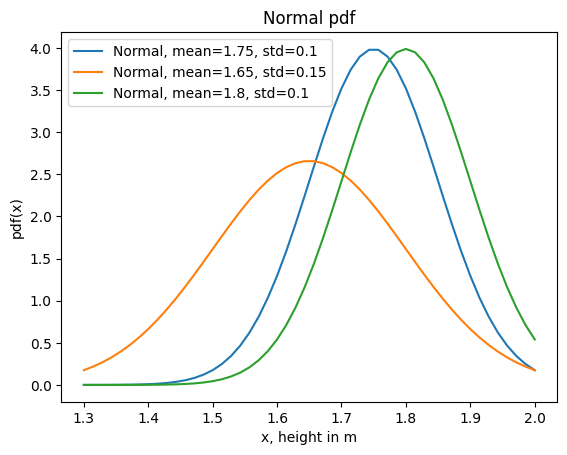

In [16]:
means = [1.75, 1.65, 1.8]
stds = [0.1, 0.15, 0.1]

fig, ax = plt.subplots(1, 1)

x = np.linspace(1.3,2,50)
n=5

for i in range(3):
    ax.plot(x, norm.pdf(x,means[i],stds[i]), ms=4, label='Normal, mean={}, std={}'.format(means[i], stds[i]))

ax.set_xlabel("x, height in m")
ax.set_ylabel("pdf(x)")
ax.set_title("Normal pdf")
ax.legend()

In [17]:
for i in range(3):
    towns = ["A", "B", "C"]
    print("The 5%-tallest people are higher than {} m in town {}".format(1-norm.cdf(1.88,means[i],stds[i]),towns[i]))

The 5%-tallest people are higher than 0.09680048458561052 m in town A
The 5%-tallest people are higher than 0.06259687279090687 m in town B
The 5%-tallest people are higher than 0.21185539858339708 m in town C


In [18]:
for i in range(3):
    towns = ["A", "B", "C"]
    print("The 5%-tallest people are higher than {} m in town {}".format(norm.ppf(0.95,means[i],stds[i]),towns[i]))

The 5%-tallest people are higher than 1.9144853626951472 m in town A
The 5%-tallest people are higher than 1.8967280440427208 m in town B
The 5%-tallest people are higher than 1.9644853626951473 m in town C


## TCL
In probability theory, the central limit theorem (CLT) establishes that, in many situations, for independent and identically distributed random variables, the sampling distribution of the standardized sample mean tends towards the standard normal distribution even if the original variables themselves are not normally distributed.
- Binomial distribution is the result of summing n random variables with Bernoulli distribution
- Erlang distribution is the result of summing n random variables with Exponential distribution

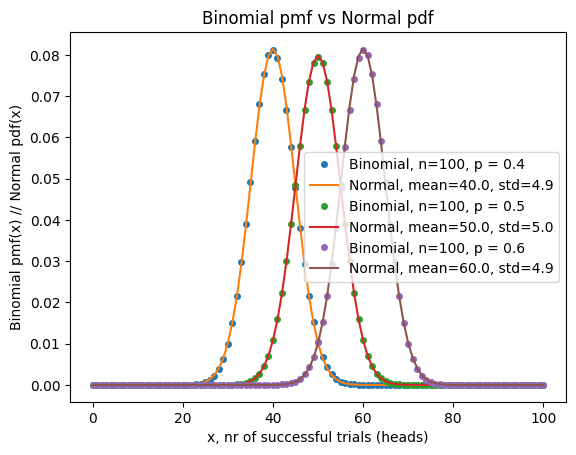

In [30]:
fig, ax = plt.subplots(1, 1)

n = 100
x = np.arange(0, n+1)
ps = [0.4, 0.5, 0.6]

for i in range(3):
    p = ps[i]
    stdi = np.sqrt(n*p*(1-p))
    ax.plot(x, binom.pmf(x, n, p), 'o', ms=4, label="Binomial, n=100, p = {}".format(p))
    ax.plot(x, norm.pdf(x, binom.mean(n,p), binom.std(n,p)), ms=4, label="Normal, mean={}, std={}".format(binom.mean(n,p), round(binom.std(n,p),2)))

ax.set_xlabel("x, nr of successful trials (heads)")
ax.set_ylabel("Binomial pmf(x) // Normal pdf(x)")
ax.set_title("Binomial pmf vs Normal pdf")
ax.legend()

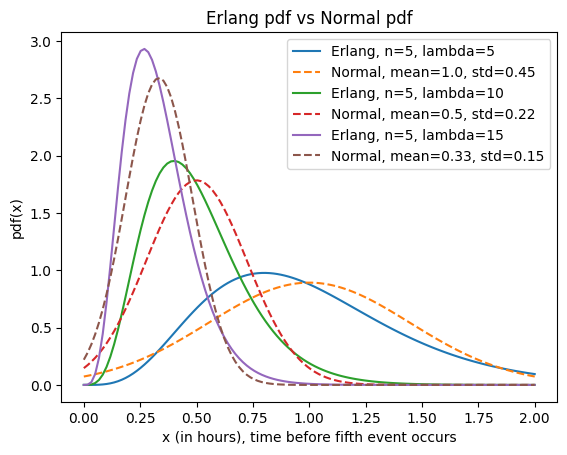

In [55]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0,2,120)
n=5

for i in range(3):
    lamb = [lamb_a,lamb_b, lamb_c][i]
    ax.plot(x, erlang.pdf(x,n,scale=1/lamb), ms=4, label='Erlang, n={}, lambda={}'.format(n, lamb))
    norm_mean = erlang.mean(n,scale=1/lamb)
    norm_std = erlang.std(n,scale=1/lamb)
    ax.plot(x, norm.pdf(x, norm_mean, norm_std), '--',ms=4, label="Normal, mean={}, std={}".format(round(norm_mean,2), round(norm_std,2)))
ax.set_xlabel("x (in hours), time before fifth event occurs")
ax.set_ylabel("pdf(x)")
ax.set_title("Erlang pdf vs Normal pdf")
ax.legend()

Approximating the binomial distribution by the normal distribution seems more sensible than approximating the Erlang distribution by the normal distribution. Actually, it depends on the parameter n.

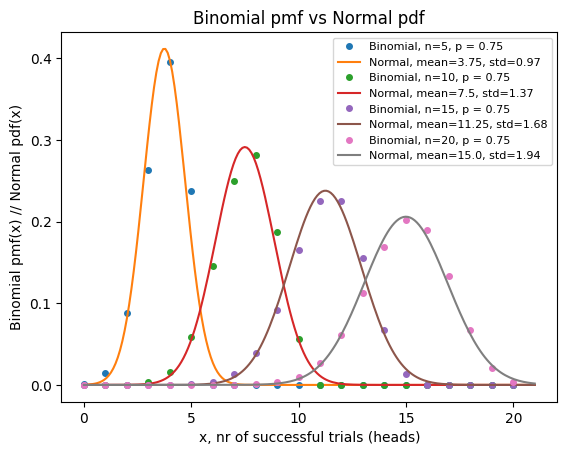

In [62]:
fig, ax = plt.subplots(1, 1)

ns = [5, 10, 15, 20]
x = np.arange(0, max(ns)+1)
ps = [0.75] * len(ns)
for i in range(len(ns)):
    p = ps[i]
    n = ns[i]
    stdi = np.sqrt(n*p*(1-p))
    ax.plot(x, binom.pmf(x, n, p), 'o', ms=4, label="Binomial, n={}, p = {}".format(n, round(p,2)))
    x_norm = np.linspace(0,  max(ns)+1,200)
    ax.plot(x_norm, norm.pdf(x_norm, binom.mean(n,p), binom.std(n,p)), ms=4, label="Normal, mean={}, std={}".format(binom.mean(n,p), round(binom.std(n,p),2)))

ax.set_xlabel("x, nr of successful trials (heads)")
ax.set_ylabel("Binomial pmf(x) // Normal pdf(x)")
ax.set_title("Binomial pmf vs Normal pdf")
ax.legend(prop={'size': 8})

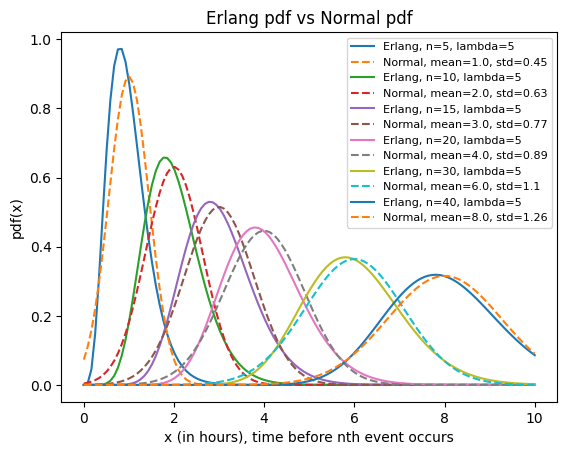

In [63]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0,10,120)
ns=[5, 10, 15, 20,30, 40]

for i in range(len(ns)):
    lamb = lamb_a
    n = ns[i]
    ax.plot(x, erlang.pdf(x,n,scale=1/lamb), ms=4, label='Erlang, n={}, lambda={}'.format(n, lamb))
    norm_mean = erlang.mean(n,scale=1/lamb)
    norm_std = erlang.std(n,scale=1/lamb)
    ax.plot(x, norm.pdf(x, norm_mean, norm_std), '--',ms=4, label="Normal, mean={}, std={}".format(round(norm_mean,2), round(norm_std,2)))
ax.set_xlabel("x (in hours), time before nth event occurs")
ax.set_ylabel("pdf(x)")
ax.set_title("Erlang pdf vs Normal pdf")
ax.legend(prop={'size': 8})

Other distributions tend to the normal one when a parameter increases.
- Poisson when lambda is over 5 (recall that Poisson distribution can be approximated by a binomial distribution, to which we can apply the CLT)

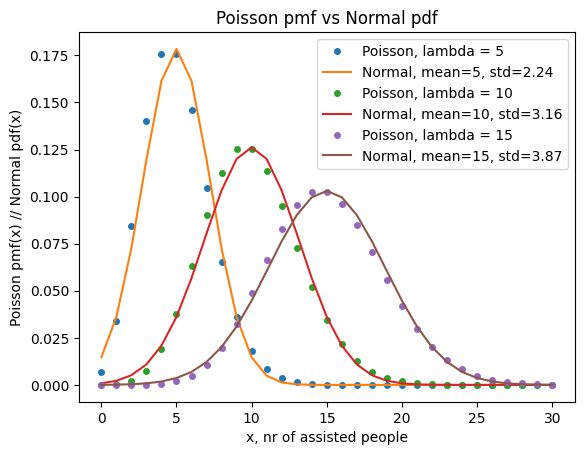

In [65]:
fig, ax = plt.subplots(1, 1)

n = 30
x = np.arange(0, n+1)
lambdas = [5, 10, 15]

for i in range(3):
    lambd = lambdas[i]
    ax.plot(x, poisson.pmf(x, lambd), 'o', ms=4, label="Poisson, lambda = {}".format(lambd))
    ax.plot(x, norm.pdf(x, poisson.mean(lambd), poisson.std(lambd)), ms=4, label="Normal, mean={}, std={}".format(lambd, round(poisson.std(lambd),2)))

ax.set_xlabel("x, nr of assisted people")
ax.set_ylabel("Poisson pmf(x) // Normal pdf(x)")
ax.set_title("Poisson pmf vs Normal pdf")
ax.legend()